In [1]:
import pyansys
from pyansys import examples

In [2]:
filename = examples.hexarchivefile

In [3]:
archive = pyansys.Archive(filename)

In [5]:
for key in archive.raw:
     print("%s : %s" % (key, archive.raw[key]))

rnum : []
rdat : []
ekey : [[  1 186]]
nnum : [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 

C:\ProgramData\Anaconda3\lib\site-packages\vtk\util\numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


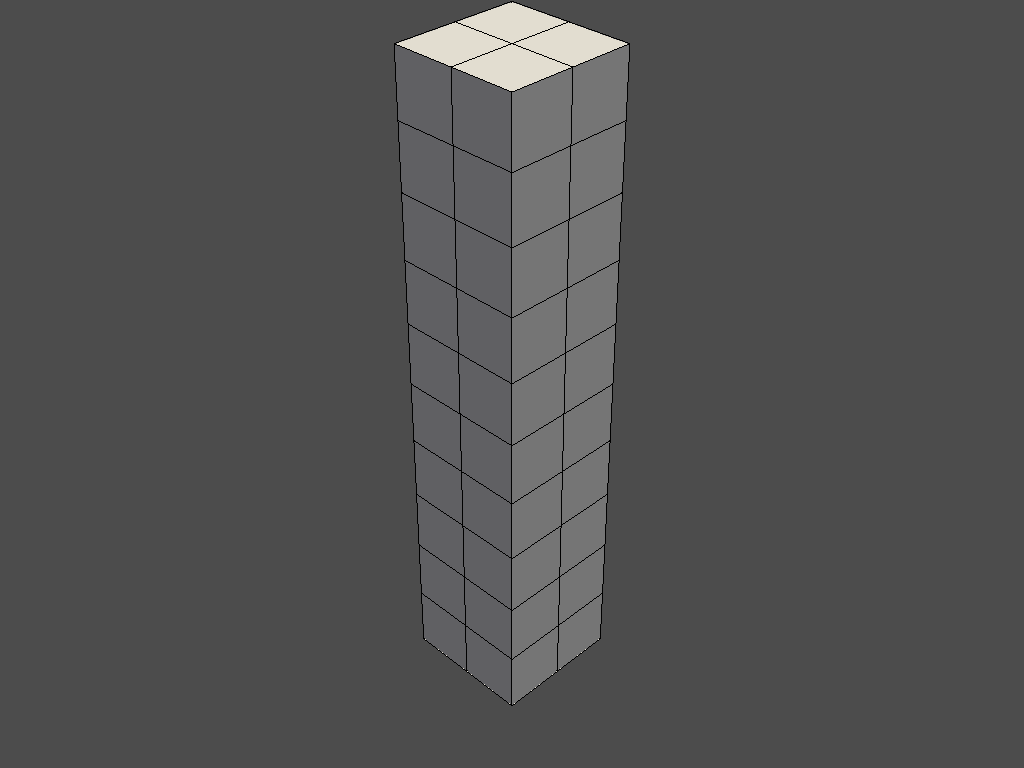

ERROR:root:The interactor must be set prior to enabling/disabling widget


In [6]:
# Create a vtk unstructured grid from the raw data and plot it
grid = archive.parse_vtk(force_linear=True)
grid.plot(color='w', show_edges=True)

In [8]:
import pyansys
from pyansys import examples

# load example beam result file
result = pyansys.read_binary(examples.rstfile)

# save as a binary vtk xml file
result.save_as_vtk('beam.vtu')

DEBUG:pyansys.rst:There are 6 result(s) in this file
C:\ProgramData\Anaconda3\lib\site-packages\vtk\util\numpy_support.py:137: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


#### output pressure data for ECR-calcution
- select relevant nodes
- write the require paremeters in ansys apdl
- write out the pressure data  with time  and save as csv

In [ ]:
ansys.prep7()
ansys.allsel('all')
ansys.upgeom(1, 3, 'last', STRUCT_FILE, 'rst')

In [ ]:
ansys.post1()
ansys.lsel('s', '', '', 200, 202, 1)
ansys.nsll('s', 1)
ansys.esln('s', 0)
ansys.nsle('r', 'corner')
ansys.nplot()
ansys.load_parameters()
ansys.parameters

#### write the require paremeters in ansys apdl

In [ ]:
# define the name of the substeps 
ansys.post1()
par = ['NMBR_SS_PF', 'NMBR_SS_SP', 'NMBR_SS_SWF', 'NMBR_SS_EI']
ansys.run("ND_PRES_CUR = 0")
ansys.load_parameters()

# get the substeps number of eath Loadstep
for i in range(len(par)):
    ansys.set(i + 1, 'last')
    ansys.get(par[i], 'active', 0, 'solu', 'ncmss')
    ansys.load_parameters()

NMBR_SS = sum([ansys.parameters[ele] for ele in par])
NMBR_SS_EI = ansys.parameters['NMBR_SS_EI']

# count the number of node on contact surface
ansys.get('CNTCT1_ND_NMR', 'node', 0, 'count')
# get the max nodenumber of the selected nodes
ansys.get('CNTCT1_ND_MAX', 'node', 0, 'num', 'max')
# get the min nodenumber of the selected nodes
ansys.get('CNTCT1_ND_MIN', 'node', 0, 'num', 'min')
# build a node time press tab
ansys.dim('CNTCT1_ND_PRES', 'table', 'CNTCT1_ND_NMR', NMBR_SS_EI, '', '', 'time')
ansys.load_parameters()
ansys.parameters

####  write out the pressur data e with time and save as csv 
- durch for loop werden
    - min node Nummer == aktelle node Number
    - zuerst die Zeit von einem Substep gekregt
    - schreiben die zeit als columns von Tab
    - kommen zu einer anderen Loop
        - schreiben die aktuelle node Number ald index von Tab
        - kriegen Pressure von akutelle node Number
        - kriegen die nächste node Number
- Schreibe aus als csv Datei
- Daten erkennen
- TODO: change name of dataframe